### モジュールインポート

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ensemble_outlier_sample_detection import EnsembleOutlierSampleDetector
import matplotlib.pyplot as plt
import seaborn as sns

### 定数を定義

In [2]:
SEED = 334

### データセットをインポート
明らかにyの一部が変な値になっているデータセットを使用．  
引用元: https://github.com/hkaneko1985/ensemble_outlier_sample_detection

In [3]:
example_path = 'https://raw.githubusercontent.com/hkaneko1985/ensemble_outlier_sample_detection/0583863a8381dcde5562197e2398d906c313256f/numerical_simulation_data.csv'
df = pd.read_csv(example_path, index_col = 0)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

### pairplotで分布を視覚的に確認

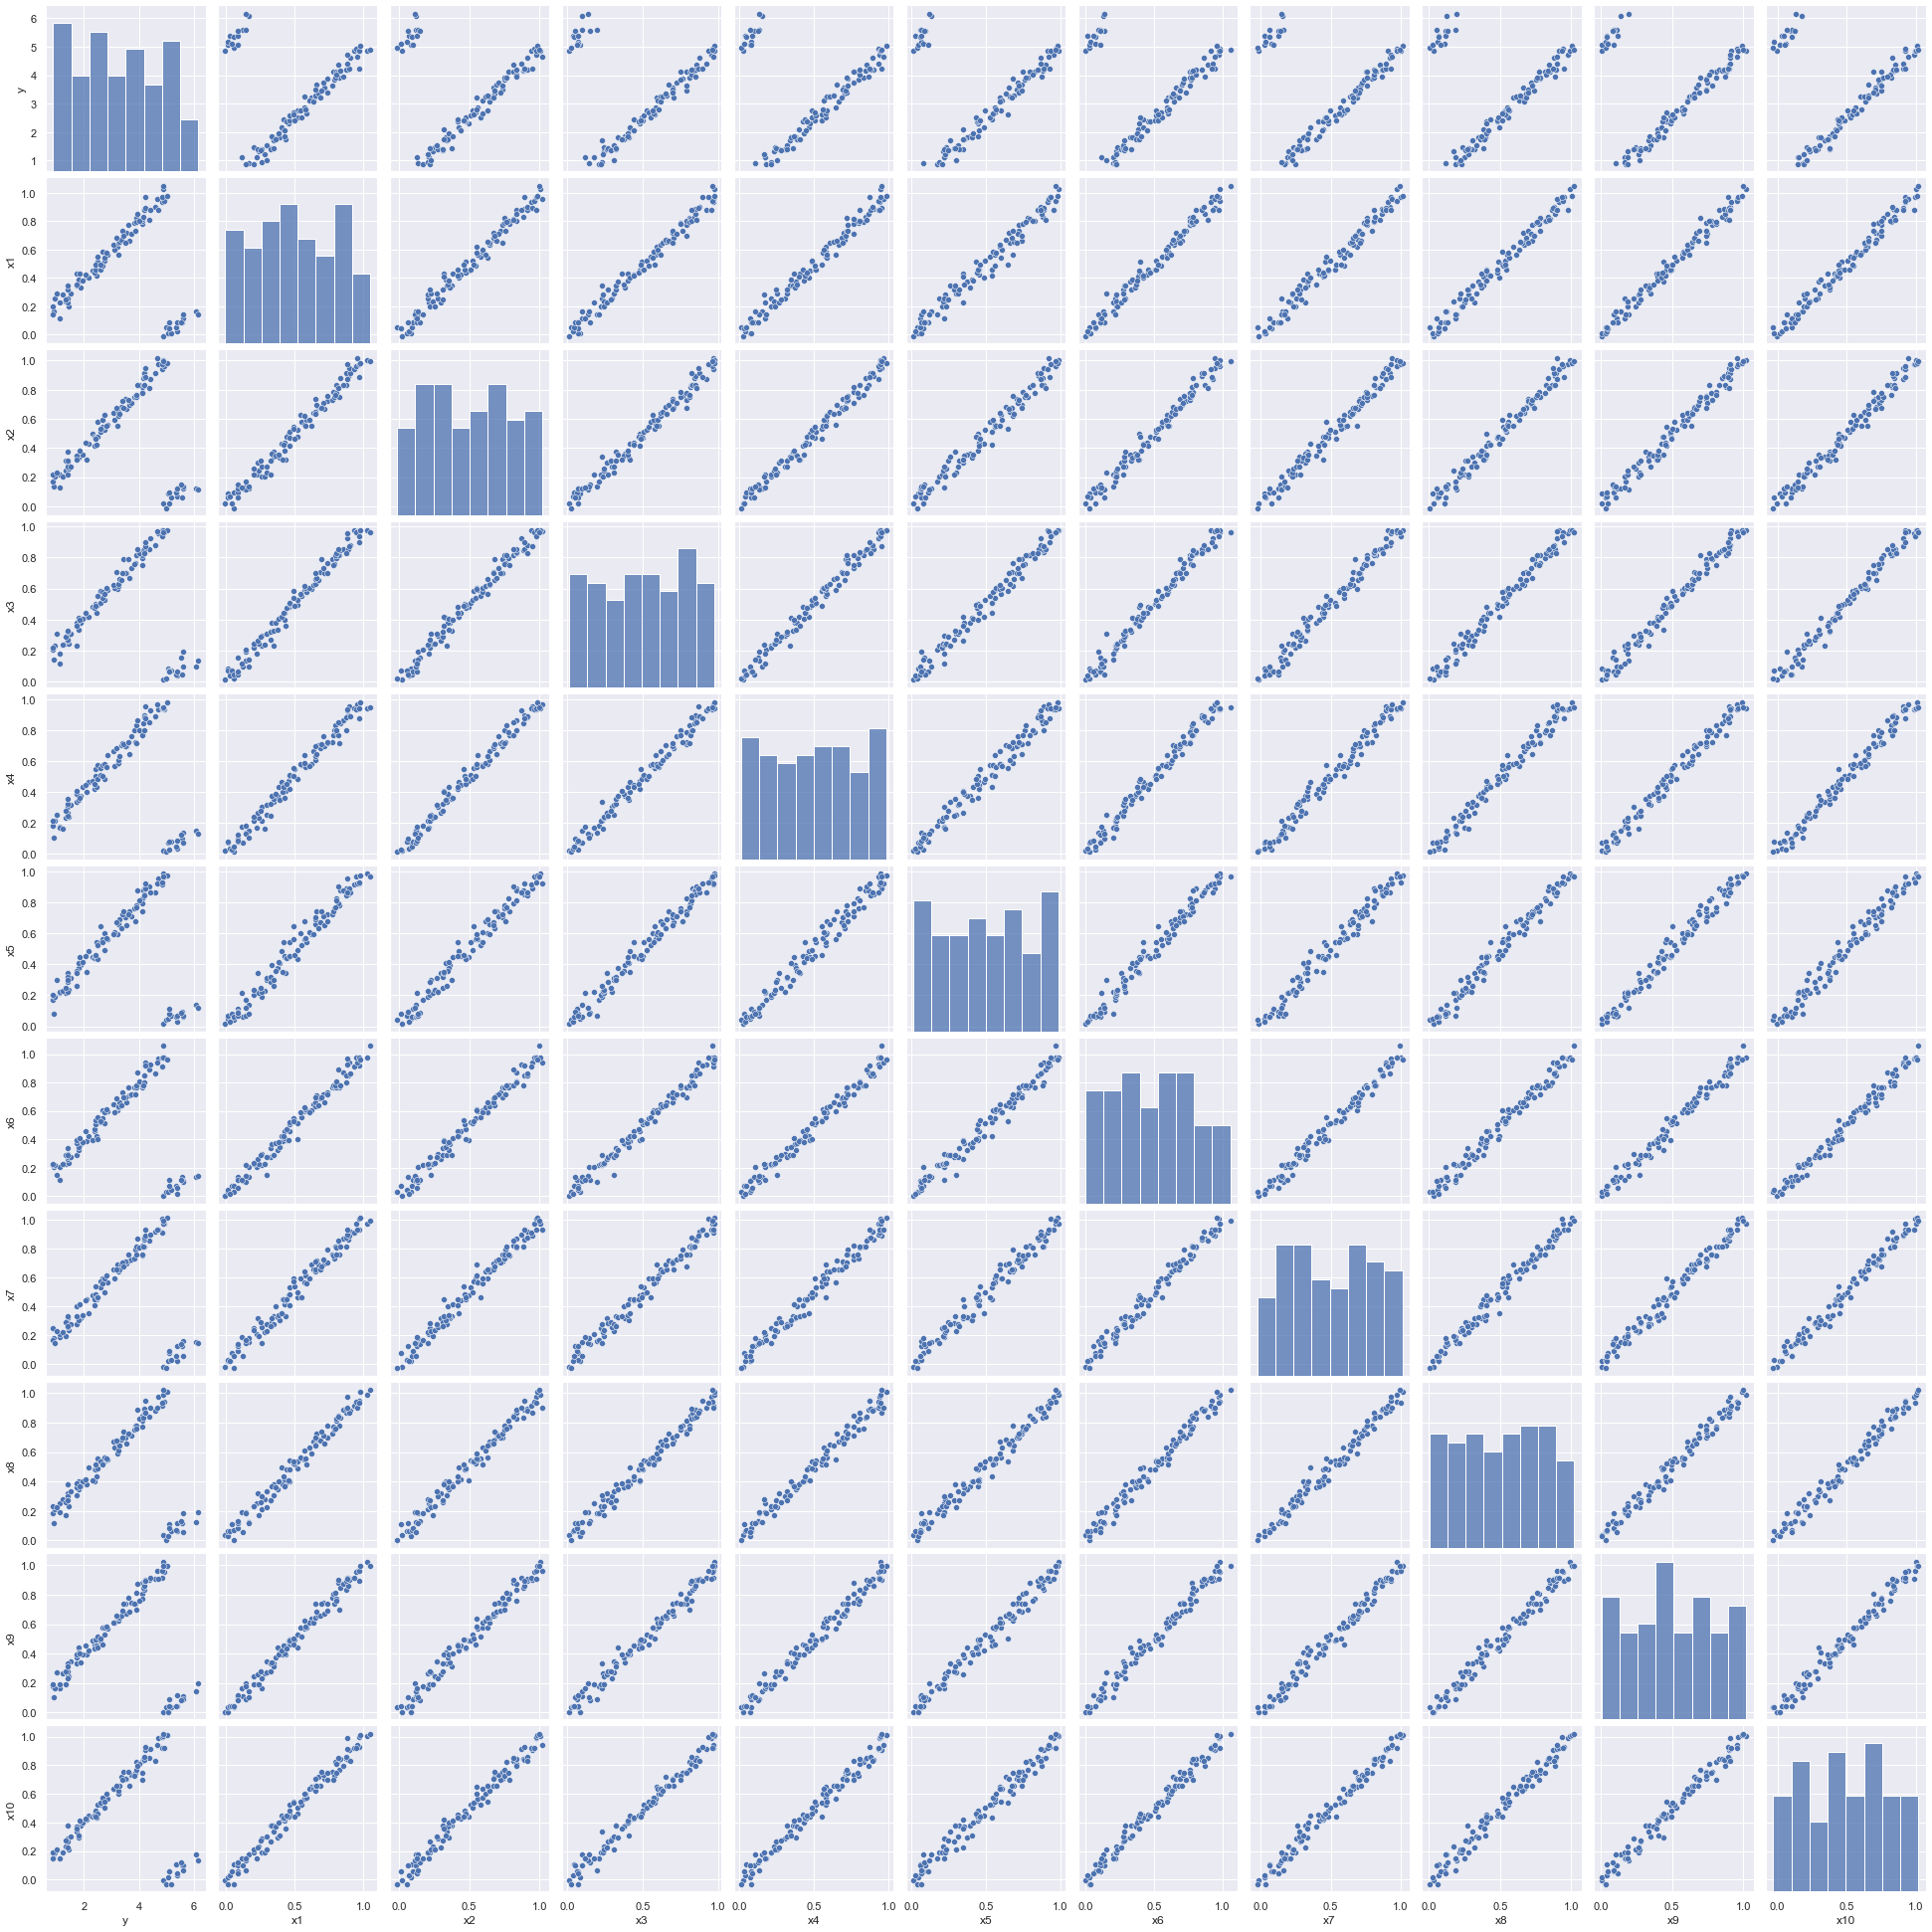

In [4]:
sns.set(style = 'darkgrid')
sns.pairplot(data = df)

### 使う機械学習モデルを事前に定義

In [5]:
rf = RandomForestRegressor(n_jobs = -1, random_state = SEED)

## 何も取り除かない場合
### 予測

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
rf.fit(X_train, y_train)
y_pred_on_train = rf.predict(X_train)
y_pred_on_test = rf.predict(X_test)

print('train: {0:.3f}'.format(r2_score(y_train, y_pred_on_train)))
print('test: {0:.3f}'.format(r2_score(y_test, y_pred_on_test)))

train: 0.972
test: 0.804


### グラフにしてみる

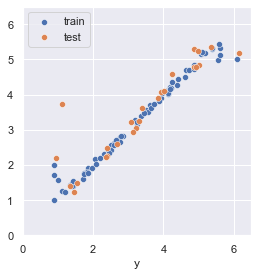

In [7]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)

sns.set(style = 'darkgrid', palette = 'pastel')
sns.scatterplot(y_train, y_pred_on_train, ax = ax, label = 'train')
sns.scatterplot(y_test, y_pred_on_test, ax = ax, label = 'test')

ax.set_xlim(0, 6.5)
ax.set_ylim(0, 6.5)

ax.set_aspect('equal')
plt.tight_layout()

### ELOをしてみる

In [8]:
elo = EnsembleOutlierSampleDetector(random_state = SEED, n_jobs = -1, cv = 5, metric = 'rmse')
elo.fit(X, y)

[iter 0 / 30]:   3%|▎         | 100/3000 [03:05<1:29:54,  1.86s/it]

### 抽出

In [9]:
X_normal = X[~elo.outlier_support_]
y_normal = y[~elo.outlier_support_]

### pairplotで分布を視覚的に確認してみる

[iter 0 / 30]:   3%|▎         | 100/3000 [03:05<1:29:48,  1.86s/it]


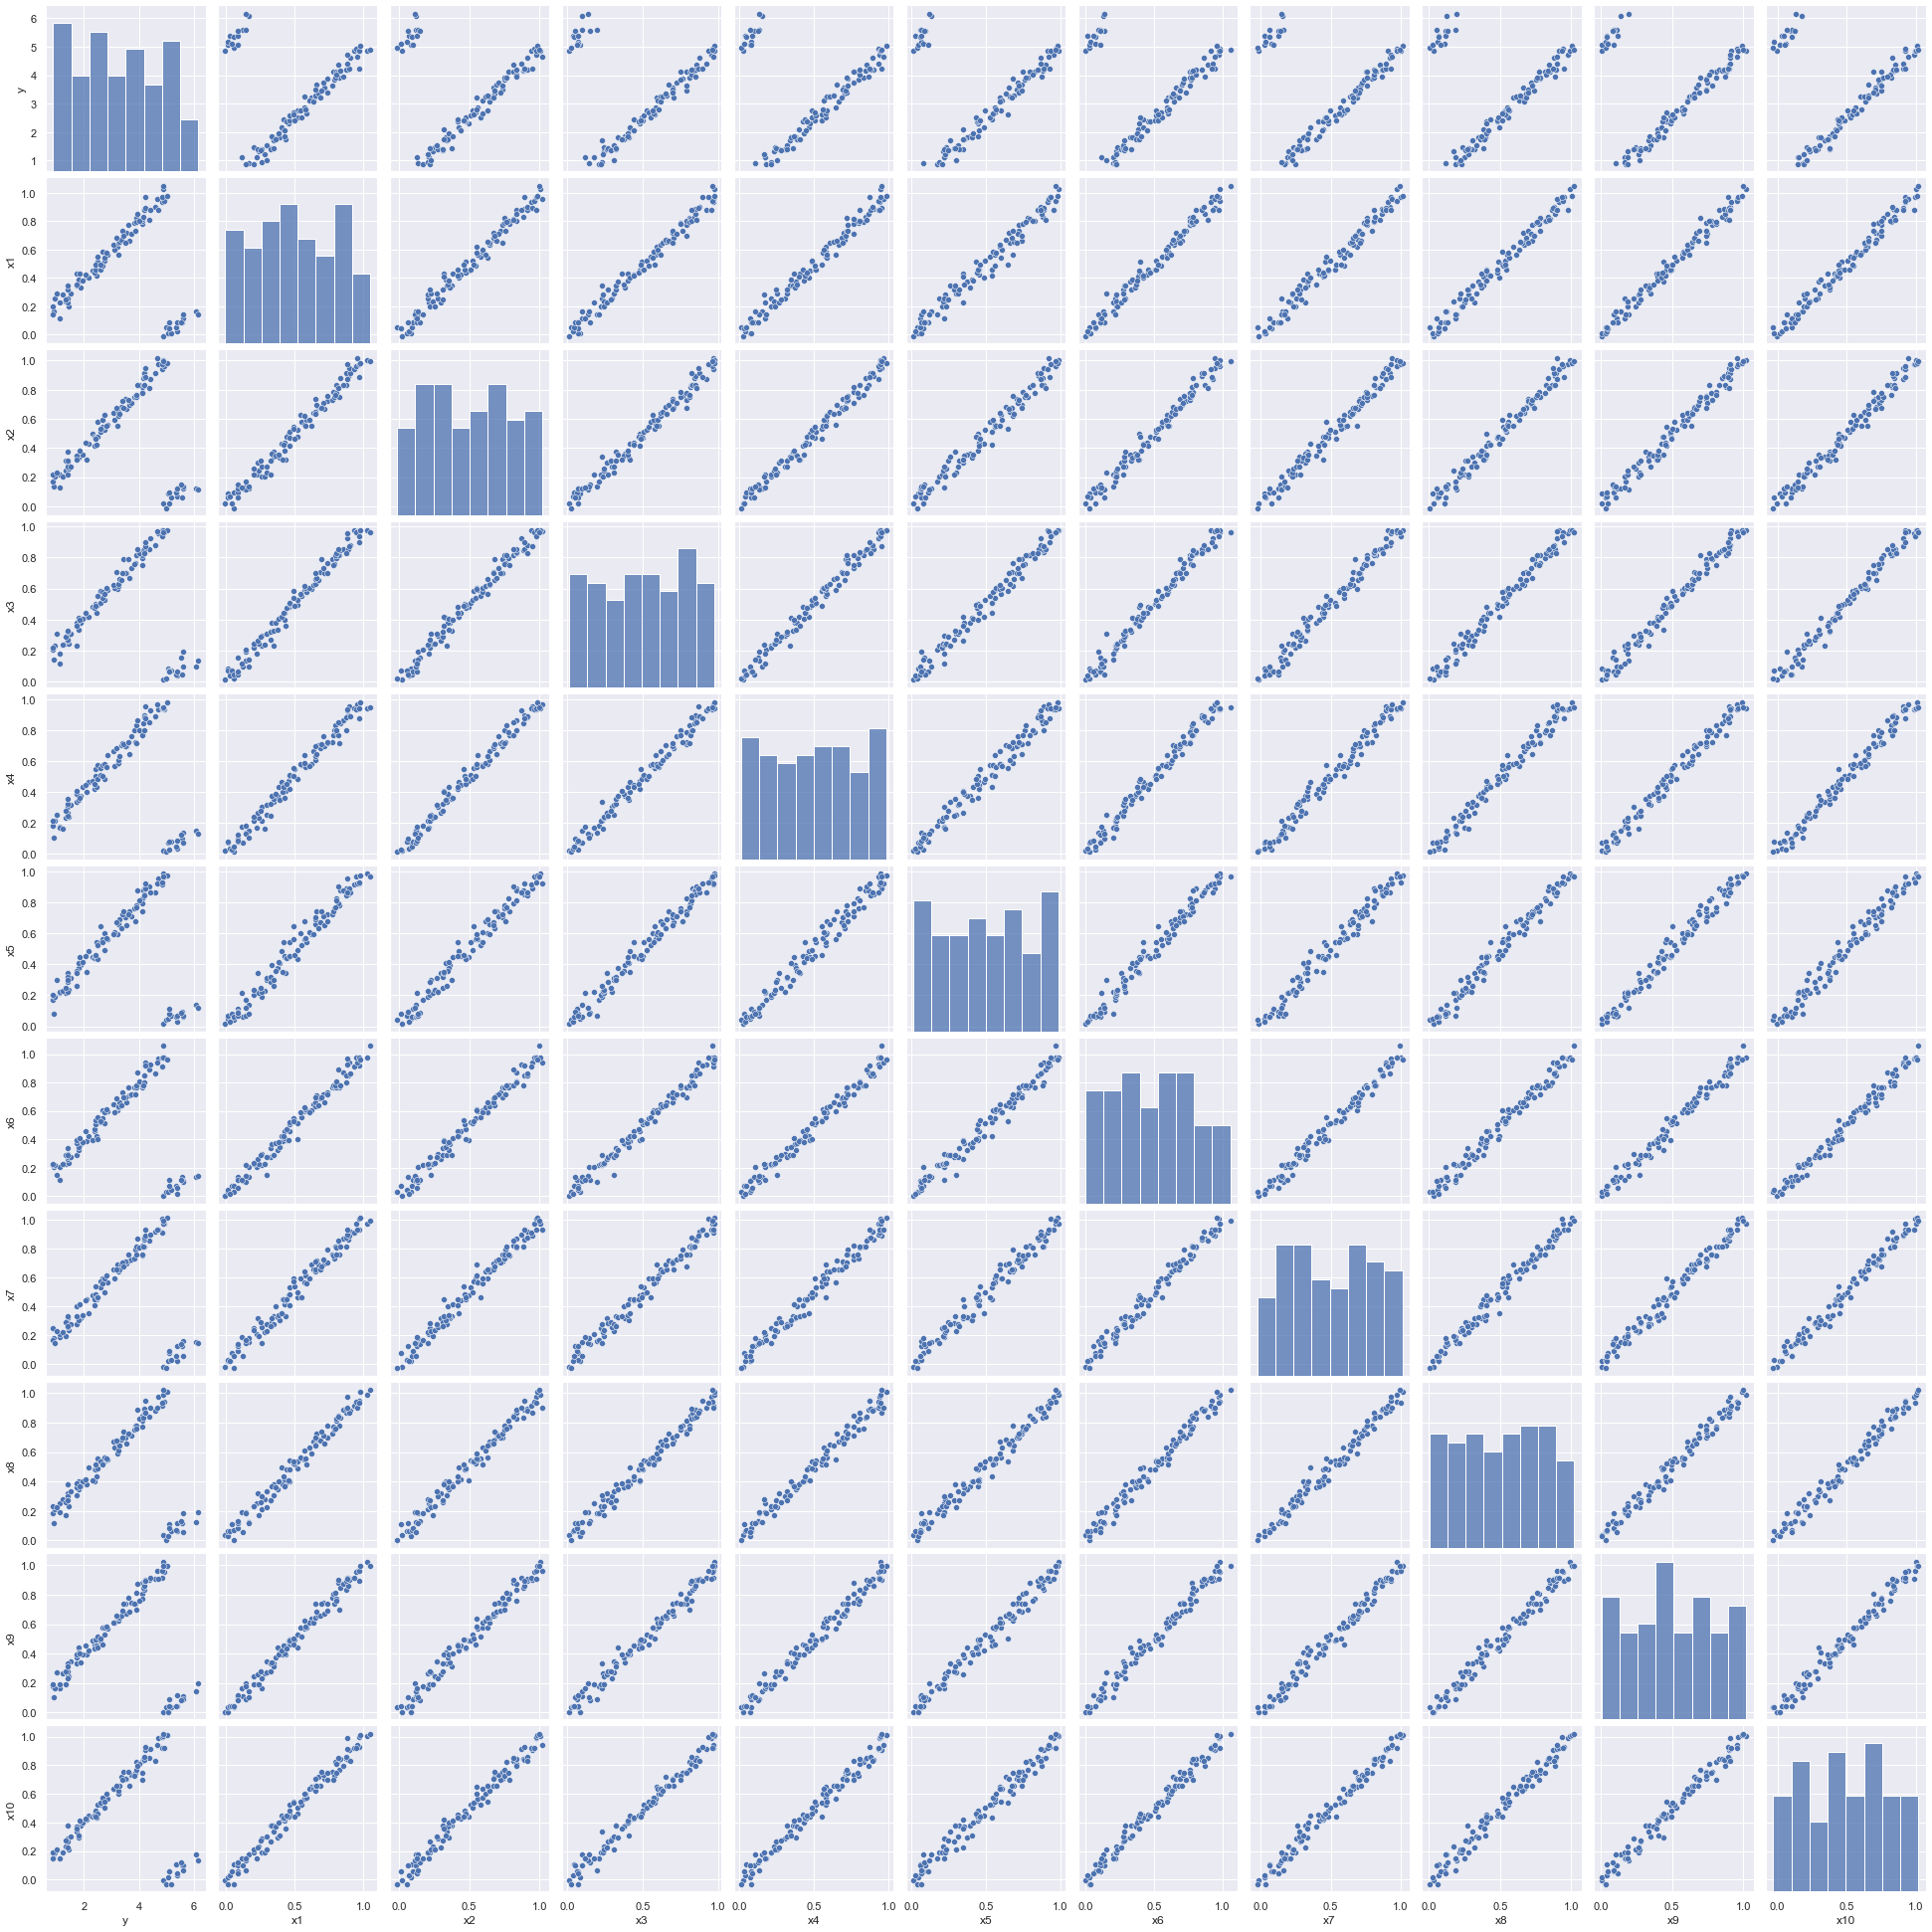

In [10]:
sns.set(style = 'darkgrid')
sns.pairplot(data = pd.concat([y_normal, X_normal], axis = 1))

### 予測してみる

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size = 0.25)
rf.fit(X_train, y_train)
y_pred_on_train = rf.predict(X_train)
y_pred_on_test = rf.predict(X_test)

print('train: {0:.3f}'.format(r2_score(y_train, y_pred_on_train)))
print('test: {0:.3f}'.format(r2_score(y_test, y_pred_on_test)))

train: 0.980
test: 0.484


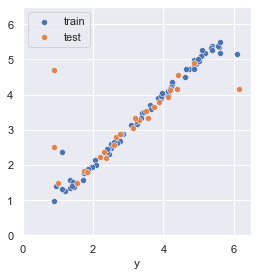

In [12]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)

sns.set(style = 'darkgrid', palette = 'pastel')
sns.scatterplot(y_train, y_pred_on_train, ax = ax, label = 'train')
sns.scatterplot(y_test, y_pred_on_test, ax = ax, label = 'test')

ax.set_xlim(0, 6.5)
ax.set_ylim(0, 6.5)

ax.set_aspect('equal')
plt.tight_layout()